In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(12,6)})

In [3]:
df = pd.read_csv("./churn_dataset.csv")

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace(" ", "0.0"))
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"}) # Only for EDA

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,No,No,No,No,No
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(f"Number of unique customers: {len(df['customerID'].unique())}")

Number of unique customers: 7043


### Dataset Card
Number of Rows: 7043<br>
Number of Columns: 21

Number of numeric columns: 3<br>
Number of categorical columns: 17<br>
Number of unique customers: 7043<br>

Columns description:
+ **customerID** (id): Unique customer id
+ **gender** (categorical): Customer gender (**Male**, **Female**)
+ **SeniorCitizen** (categorical): Whether the customer is a senior citizen or not (**1**, **0**)
+ **Partner** (categorical): Whether the customer has a partner or not (Yes, No)
+ **Dependents** (categorical): Whether the customer has dependents or not (Yes, No)
+ **tenure** (numeric): Number of months the customer has stayed with the company
+ **PhoneService** (categorical): Whether the customer has a phone service or not (Yes, No)
+ **MultipleLines** (categorical): Whether the customer has multiple lines or not (Yes, No, No phone service)
+ **InternetService** (categorical): Customer’s internet service provider (DSL, Fiber optic, No)
+ **OnlineSecurity** (categorical): Whether the customer has online security or not (Yes, No, No internet service)
+ **OnlineBackup** (categorical): Whether the customer has online backup or not (Yes, No, No internet service)
+ **DeviceProtection** (categorical): Whether the customer has device protection or not (Yes, No, No internet service)
+ **TechSupport** (categorical): Whether the customer has tech support or not (Yes, No, No internet service)
+ **StreamingTV** (categorical): Whether the customer has streaming TV or not (Yes, No, No internet service)
+ **StreamingMovies** (categorical): Whether the customer has streaming movies or not (Yes, No, No internet service)
+ **Contract** (categorical): The contract term of the customer (Month-to-month, One year, Two year)
+ **PaperlessBilling** (categorical): Whether the customer has paperless billing or not (Yes, No)
+ **PaymentMethod** (categorical): The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
+ **MonthlyCharges** (numeric): The amount charged to the customer monthly
+ **TotalCharges** (numeric): The total amount charged to the customer
+ **Churn** (categorical): Whether the customer churned or not (Yes or No). **(TARGET)**

## EDA

In [8]:
def stacked_barchart(df, groupby, target="Churn"):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
    temp_df = (df.groupby([groupby, target]).size()/df.groupby(groupby)[target].count()).reset_index().pivot(columns=target, index=groupby, values=0)
    temp_df.plot(kind='bar', stacked=True, color=['#33a02d', '#db5f57'], ax=ax)
    ax.set_xlabel(groupby)
    ax.set_ylabel("Churn Percentage")
    plt.xticks(rotation=0)
    ax.set_title(f"{target} Distribution by {groupby}")

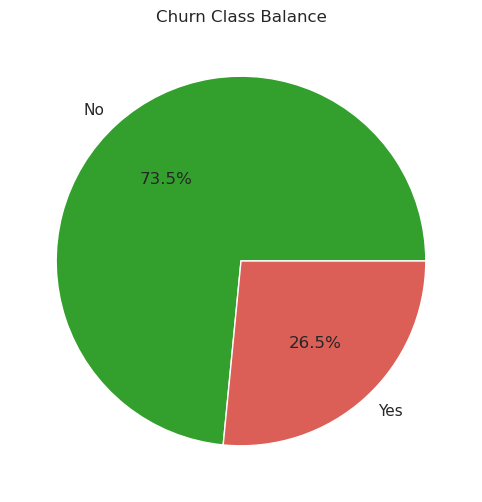

In [9]:
plt.pie(df["Churn"].value_counts(), labels=["No", "Yes"], autopct='%1.1f%%', colors=['#33a02d', '#db5f57'])
plt.title("Churn Class Balance")
plt.show()

With this plot we can see class debalancement

### Gender, Dependents, Partner, SeniorCitizen, PaperlessBilling another words **binary features**

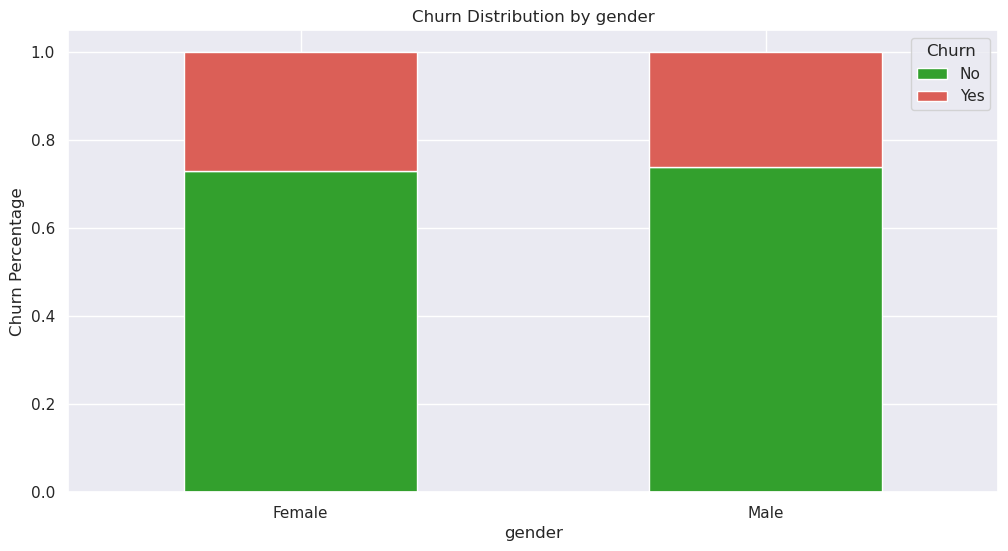

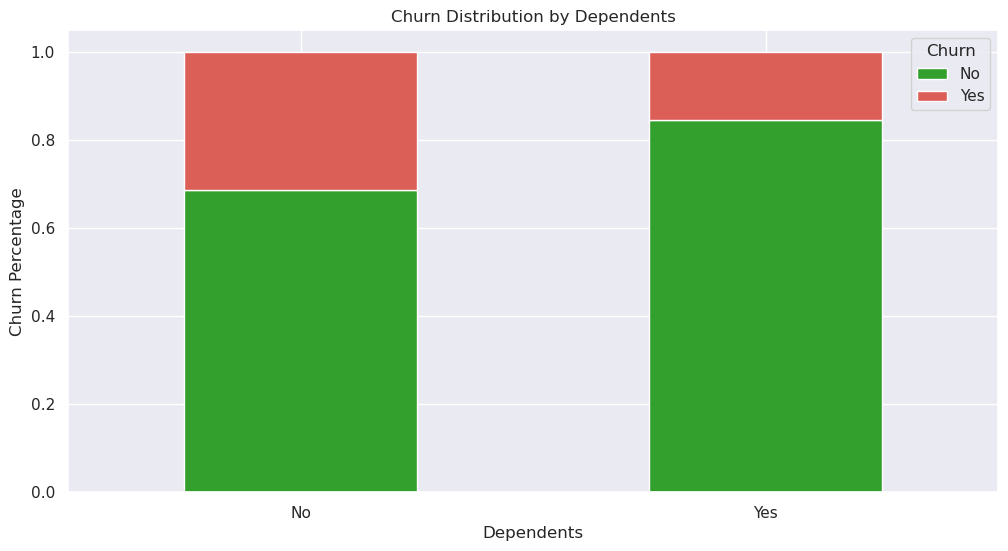

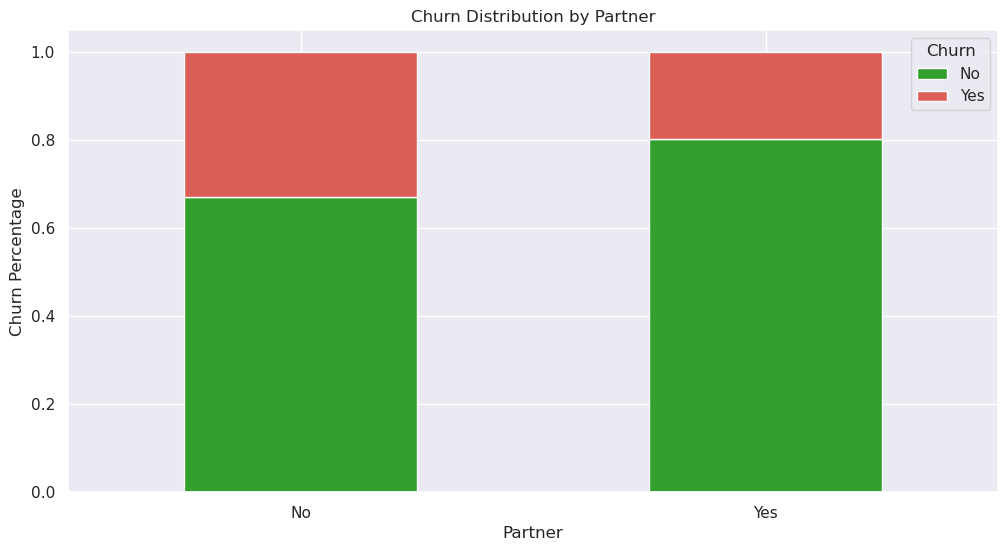

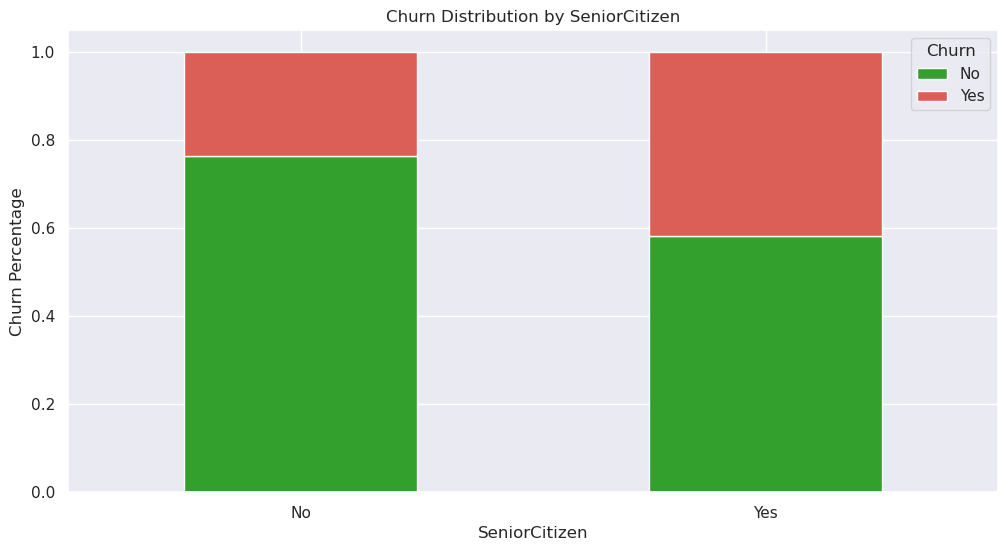

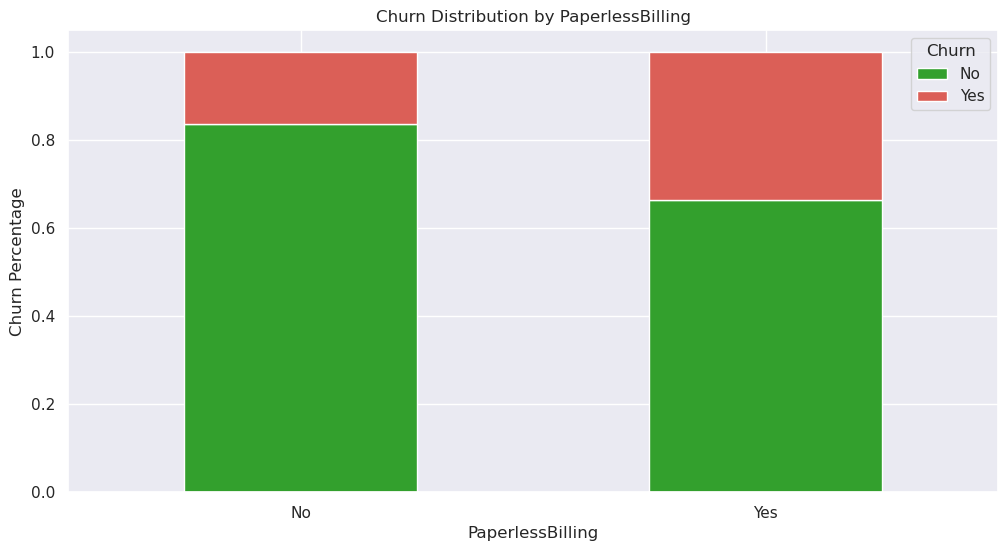

In [11]:
stacked_barchart(df, "gender")
stacked_barchart(df, "Dependents")
stacked_barchart(df, "Partner")
stacked_barchart(df, "SeniorCitizen")
stacked_barchart(df, "PaperlessBilling")

From these plots, we can observe the following:
- Gender does not influence a customer's decision to leave.
- Customers without family (no partner or dependents) are more likely to churn.
- Senior citizens have a higher likelihood of leaving.
- Customers using paperless billing are more likely to churn.

### PhoneService, MultipleLines another words **features which connected with PhoneService**

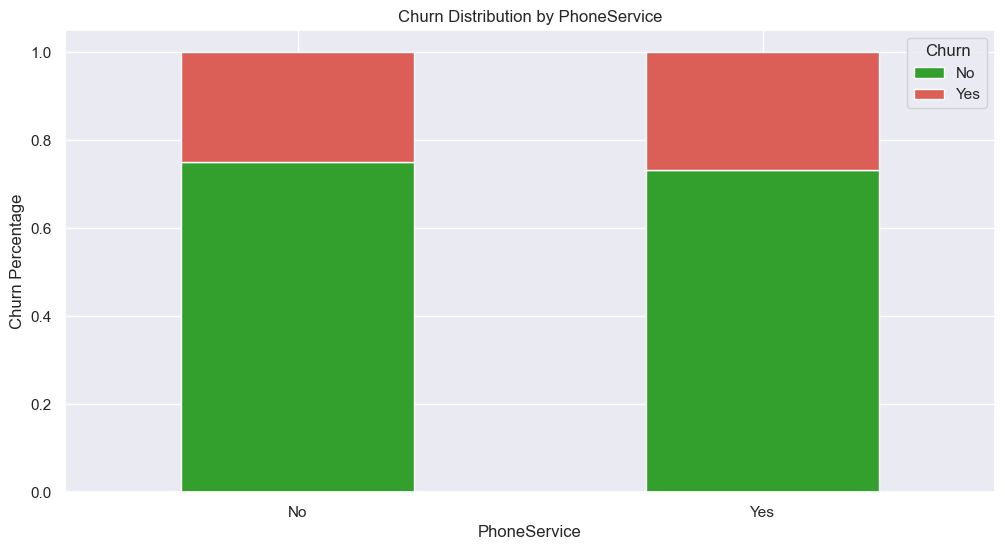

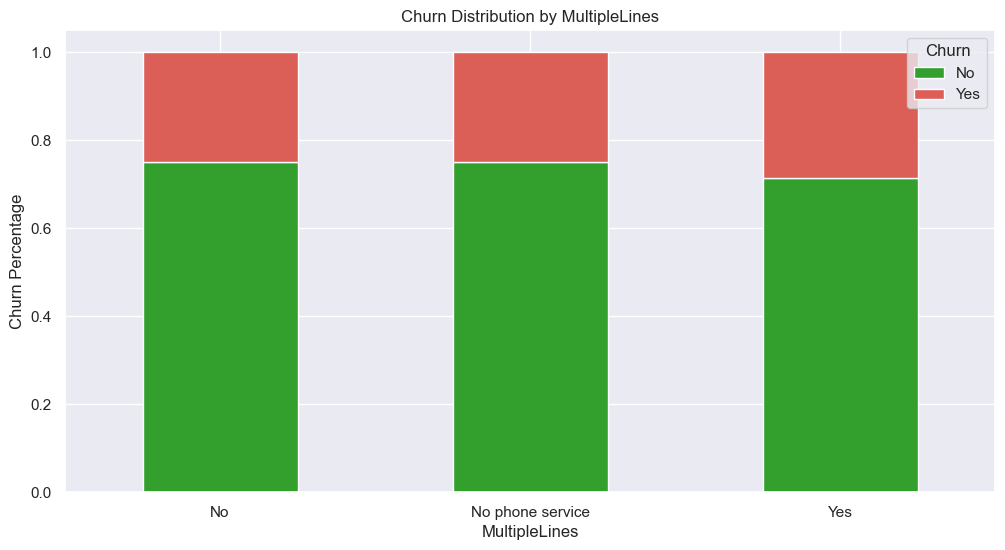

In [10]:
stacked_barchart(df, "PhoneService")
stacked_barchart(df, "MultipleLines")

### InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies another words **features which connected with InternetService**

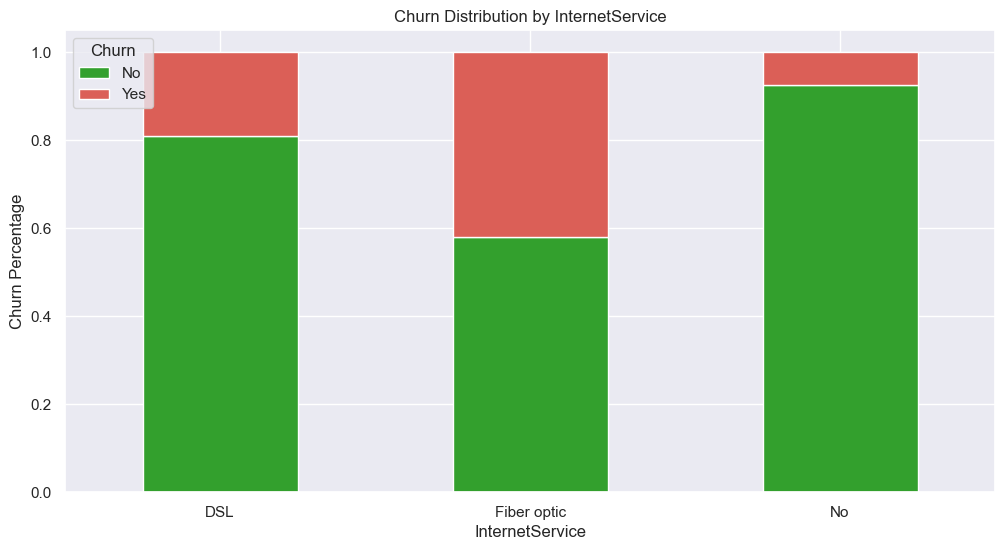

In [11]:
stacked_barchart(df, "InternetService")

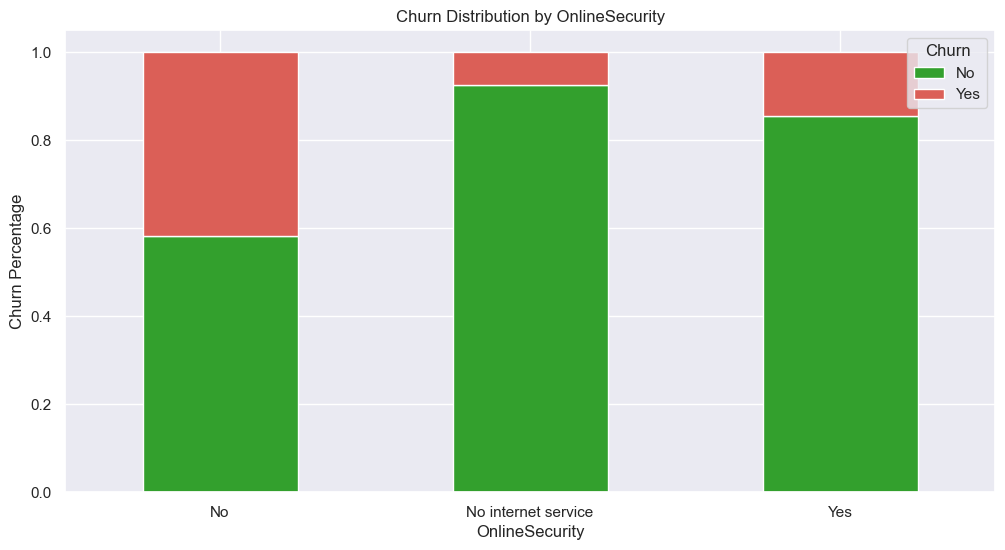

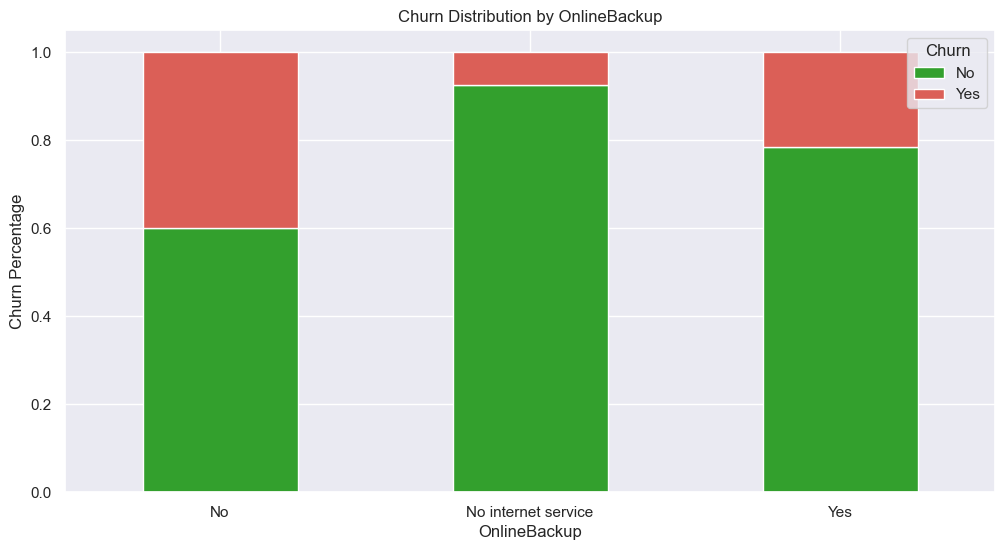

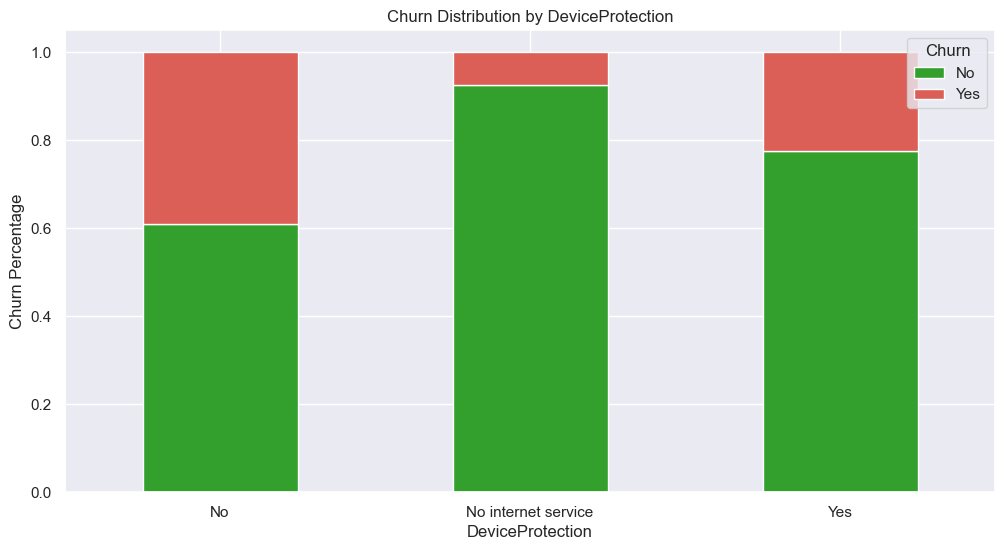

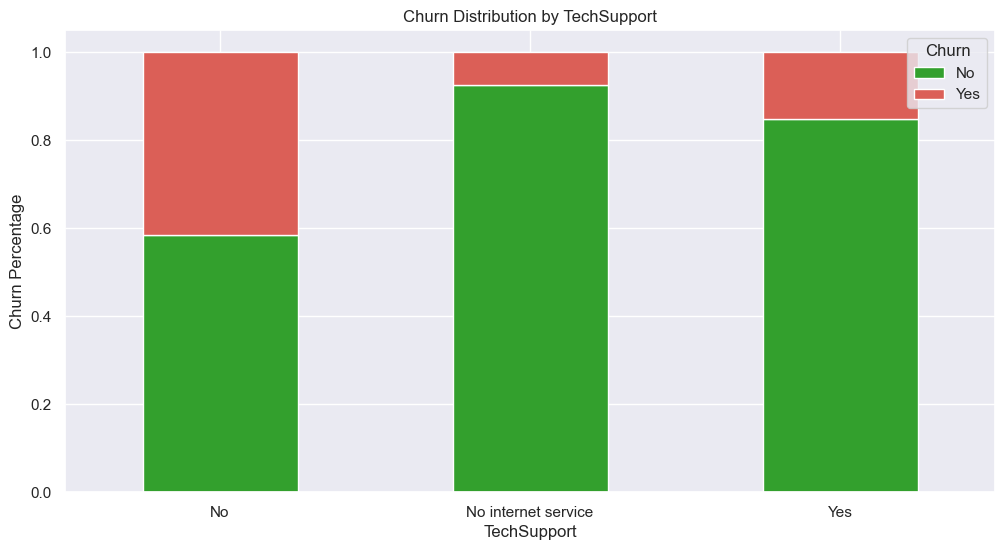

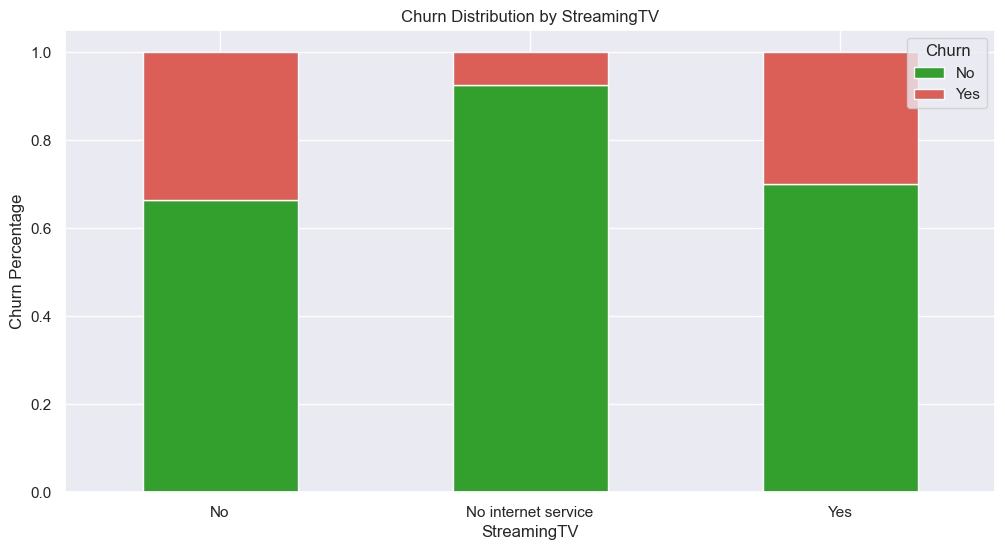

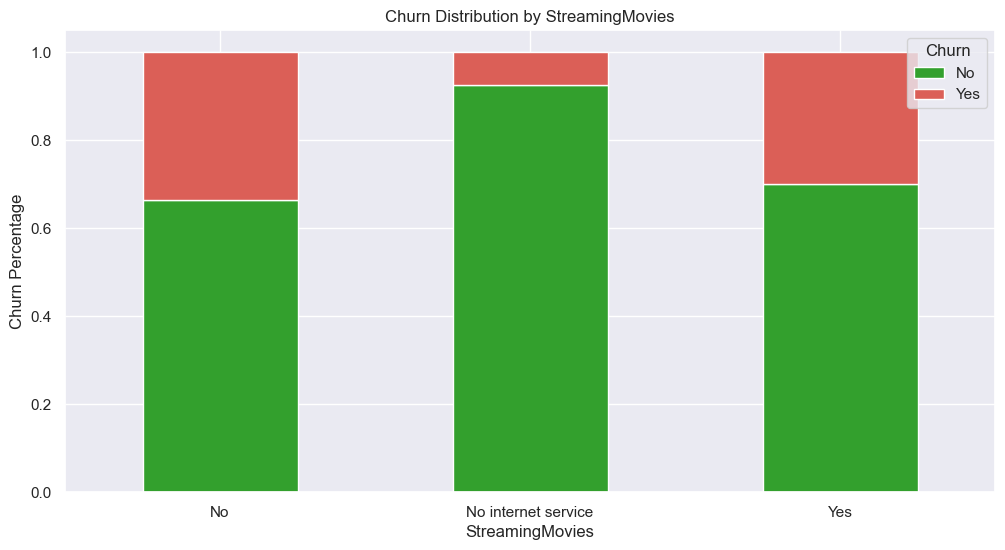

In [12]:
stacked_barchart(df, "OnlineSecurity")
stacked_barchart(df, "OnlineBackup")
stacked_barchart(df, "DeviceProtection")
stacked_barchart(df, "TechSupport")
stacked_barchart(df, "StreamingTV")
stacked_barchart(df, "StreamingMovies")

### Tenure

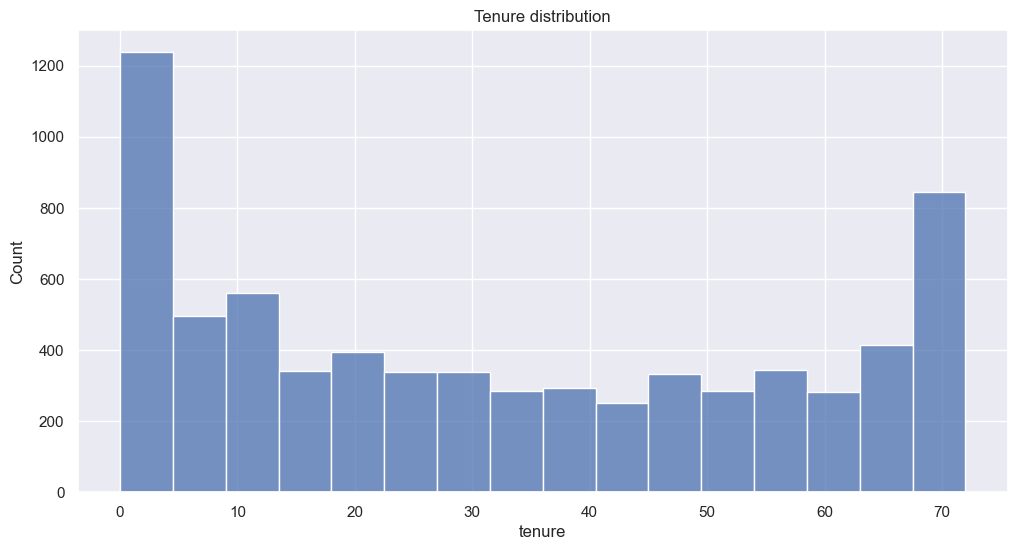

In [13]:
sns.histplot(df["tenure"])
plt.title("Tenure distribution")
plt.show()

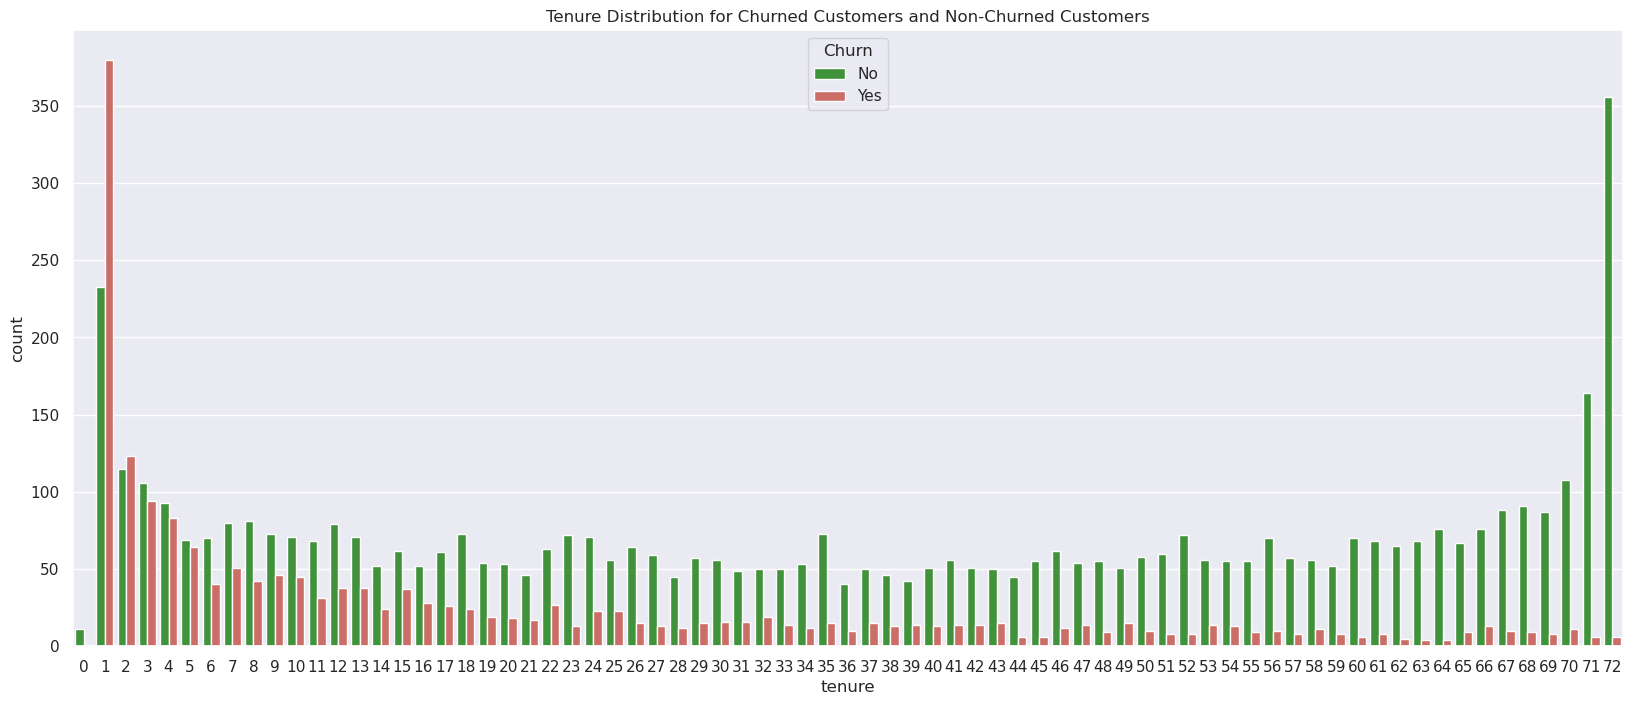

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
sns.countplot(data=df, x="tenure", hue="Churn", palette=['#33a02d', '#db5f57'])
plt.title("Tenure Distribution for Churned Customers and Non-Churned Customers")
plt.show()

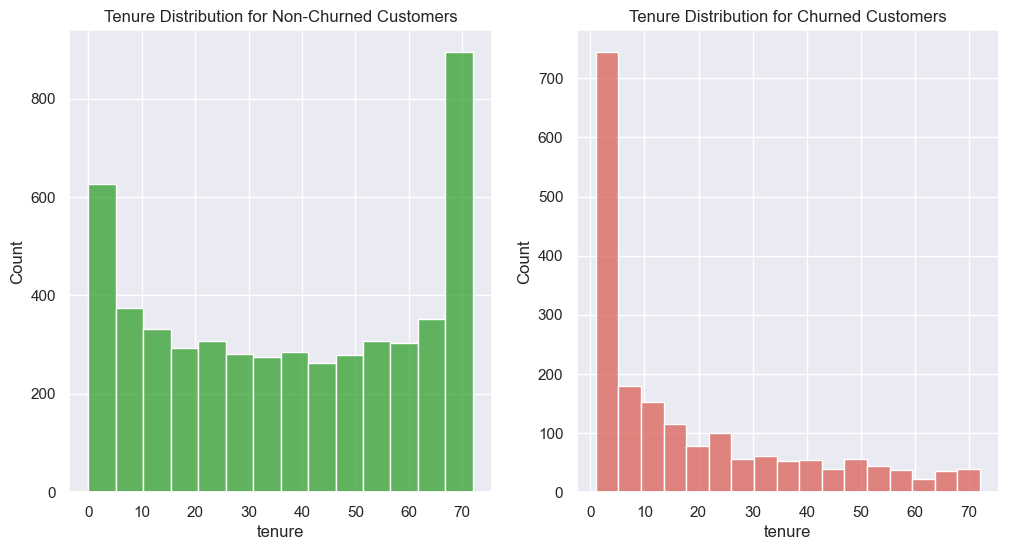

In [15]:
fig, (alive_ax, churn_ax) = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
sns.histplot(df[df["Churn"] == "No"]["tenure"], ax=alive_ax, color='#33a02d')
sns.histplot(df[df["Churn"] == "Yes"]["tenure"], ax=churn_ax, color='#db5f57')
alive_ax.set_title("Tenure Distribution for Non-Churned Customers")
churn_ax.set_title("Tenure Distribution for Churned Customers")
plt.show()

From these plots, we can observe the following:
- Customers who less time with company are more likely Churn

### Monthly Charges

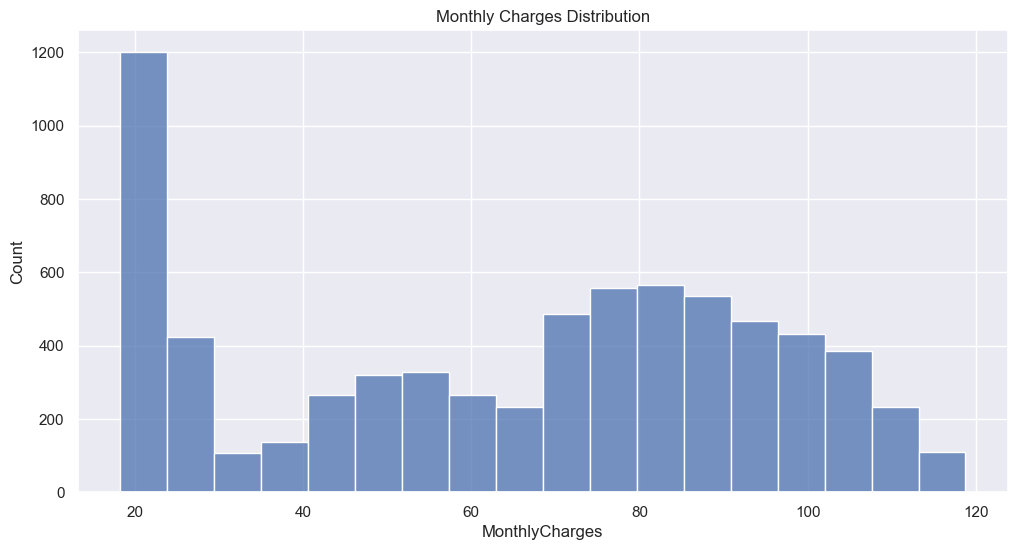

In [16]:
sns.histplot(df["MonthlyCharges"])
plt.title("Monthly Charges Distribution")
plt.show()

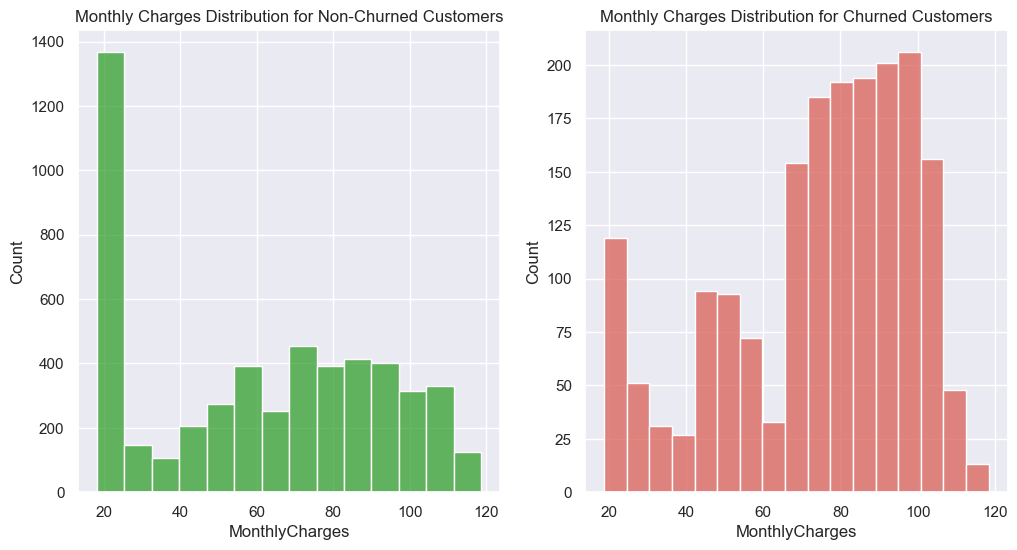

In [17]:
fig, (alive_ax, churn_ax) = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
sns.histplot(df[df["Churn"] == "No"]["MonthlyCharges"], ax=alive_ax, color='#33a02d')
sns.histplot(df[df["Churn"] == "Yes"]["MonthlyCharges"], ax=churn_ax, color='#db5f57')
alive_ax.set_title("Monthly Charges Distribution for Non-Churned Customers")
churn_ax.set_title("Monthly Charges Distribution for Churned Customers")
plt.show()

From these plots, we can observe the following:
- Customers who pay big amout of money monthly are more likely Churn

### Contract

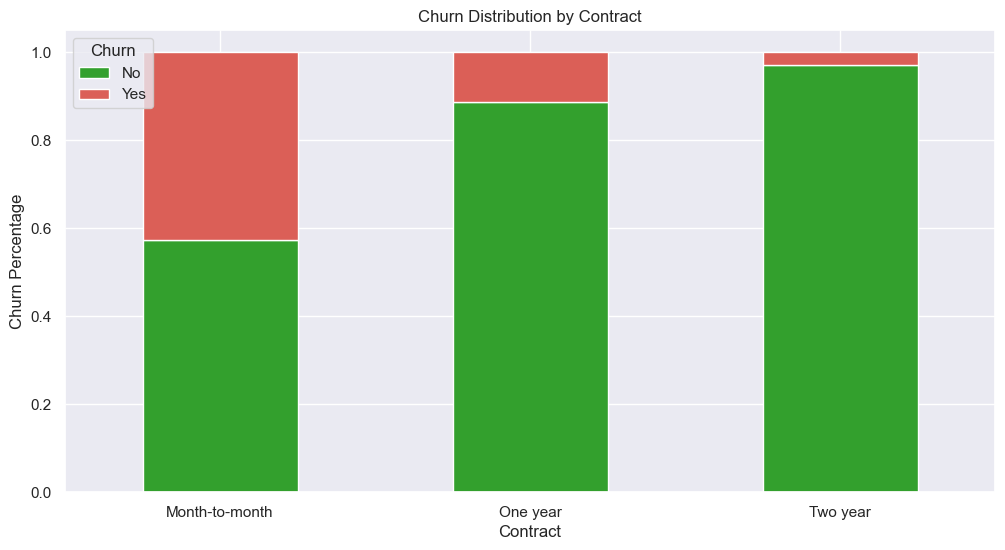

In [18]:
stacked_barchart(df, "Contract")

Customers using **Mouth-to-month** contract are more likely to churn because customers with **Mouth-to-month** contract generally has a little time with company (this we can see in the next plot) this means they are less loyal

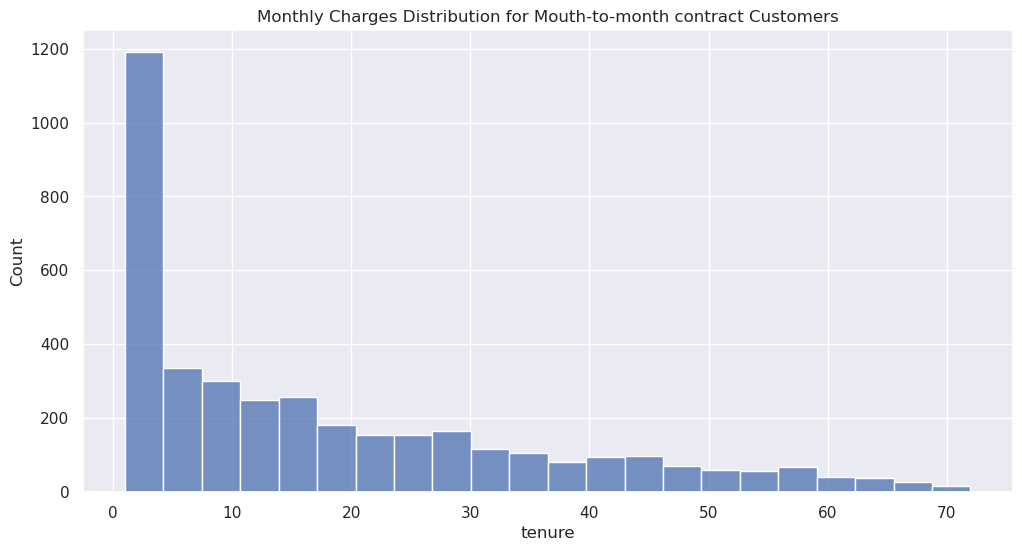

In [41]:
sns.histplot(df[df["Contract"] == "Month-to-month"]["tenure"])
plt.title("Monthly Charges Distribution for Mouth-to-month contract Customers")
plt.show()

### Payment Method

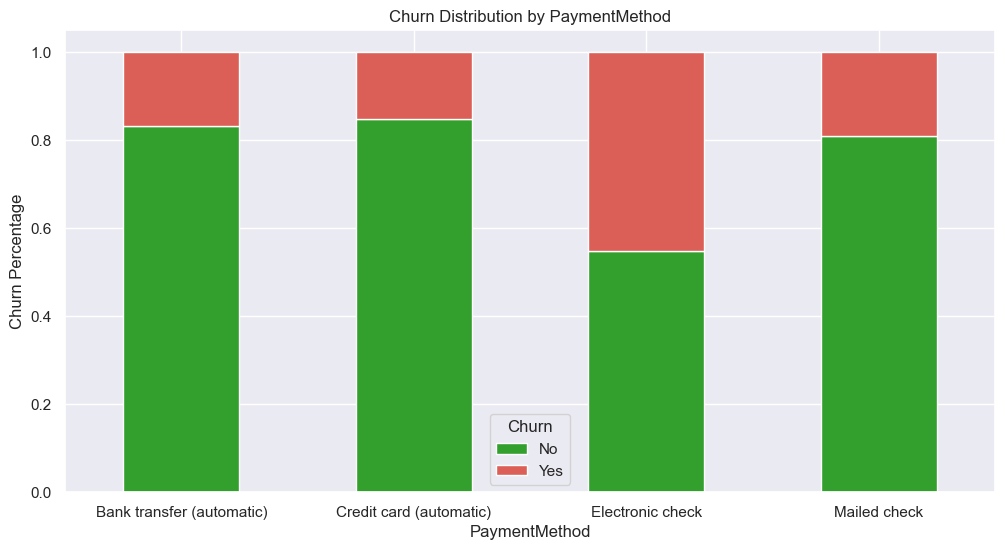

In [19]:
stacked_barchart(df, "PaymentMethod")

Customers using **Electronic check** are more likely to churn. But most customers who use **Electronic checks** have **Month-to-month** contract and this we can in the **next plot**

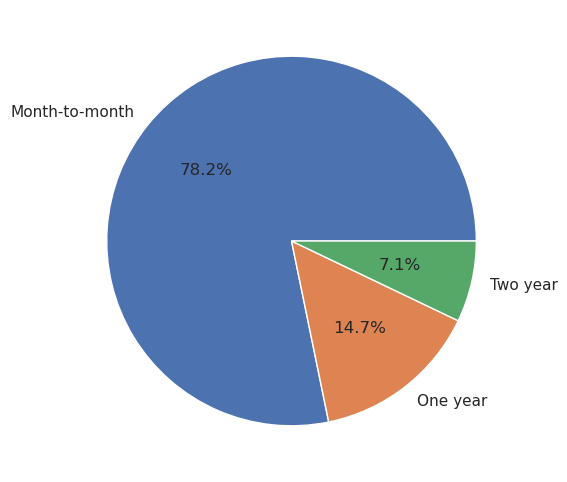

In [34]:
plt.pie(df[df["PaymentMethod"] == "Electronic check"]["Contract"].value_counts(), labels=df["Contract"].unique(), autopct='%1.1f%%')
plt.show()

To Be Continued